Predicting players rating
In this project you are going to predict the overall rating of soccer player based on their attributes
such as 'crossing', 'finishing etc.
The dataset you are going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than
10,000 players for European professional soccer seasons from 2008 to 2016.
Download the data in the same folder and run the following commmand to get it in the environment

<b>About the Dataset</b>

The ultimate Soccer database for data analysis and machine learning<br>
The dataset comes in the form of an SQL database and contains statistics of about 25,000 football
matches, from the top football league of 11 European Countries. It covers seasons from 2008 to
2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations,
with player names and a pair of coordinates to indicate their position on the pitch.
+25,000 matches
+10,000 players
11 European Countries with their lead championship
Seasons 2008 to 2016
Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the
weekly updates
Team line up with squad formation (X, Y coordinates)
Betting odds from up to 10 providers
Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000
matches
The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video
games. It is not just the stats that come with a new version of the game but also the weekly
updates. So for instance if a player has performed poorly over a period of time and his stats get
impacted in FIFA, you would normally see the same in the dataset.

In [2]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [5]:
# Create your connection.
cnx = sqlite3.connect('database_soccer.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [6]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [7]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


# Data Cleaning: Handling Missing Data

In [9]:

#is any row NULL ?
df.isnull().any().any(), df.shape

(True, (183978, 42))

In [11]:
#Now let’s try to find how many data points in each column are null.
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [12]:
# Fix it

# Take initial # of rows
rows = df.shape[0]

# Drop the NULL rows
df = df.dropna()

#Check if all NULLS are gone ?
print(rows)
df.isnull().any().any(), df.shape

183978


(False, (180354, 42))

In [14]:
#Shuffle the rows of df so we get a distributed sample when we display top few rows
import numpy as np
df = df.reindex(np.random.permutation(df.index))

In [15]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
339,340,2335,23499,2015-02-27 00:00:00,65.0,65.0,right,medium,medium,48.0,...,67.0,72.0,22.0,25.0,25.0,11.0,12.0,9.0,9.0,8.0
87343,87344,146747,37492,2009-02-22 00:00:00,73.0,66.0,right,medium,medium,80.0,...,51.0,61.0,73.0,71.0,62.0,7.0,24.0,79.0,24.0,24.0
89764,89765,200647,147951,2014-05-02 00:00:00,76.0,78.0,left,medium,medium,80.0,...,78.0,72.0,30.0,40.0,35.0,13.0,13.0,8.0,12.0,6.0
8508,8509,184941,50047,2013-02-15 00:00:00,85.0,88.0,right,high,high,75.0,...,77.0,74.0,30.0,42.0,36.0,10.0,10.0,15.0,12.0,13.0
48876,48877,168561,22313,2014-09-18 00:00:00,73.0,73.0,left,medium,medium,73.0,...,75.0,70.0,68.0,71.0,76.0,14.0,9.0,15.0,15.0,15.0


In [16]:
#Feature Correlation Analysis
#Next, we will check if ‘penalties’ is correlated to ‘overall_rating’. 
#We are using a similar selection operation, by this time for all the rows and within the correlation function.


df['overall_rating'].corr(df['penalties'])

0.39271510791118824

Pearson goes from -1 to +1. A value of 0 would have told there is no correlation, 
<br>so we shouldn’t bother looking at that attribute. A value of 0.39 shows some correlation, although it could be stronger. 
<br>
At least, we have these attributes which are slightly correlated. 
<br>This gives us hope that we might be able to build a meaningful predictor using these ‘weakly’ correlated features.


In [17]:
#Create a list of potential Features that you want to measure correlation with
potentialFeatures = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina']

# check how the features are correlated with the overall ratings

for f in potentialFeatures:
    related = df['overall_rating'].corr(df[f])
    print("%s: %f" % (f,related))

acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


Looking at the values printed by the previous cell, we notice that the to two are “ball_control” (0.44) and 
<br>“shot_power” (0.43). So these two features seem to have higher correlation with “overall_rating”.

# Data Visualization:


Next we will start plotting the correlation coefficients of each feature with “overall_rating”. <br>
We start by selecting the columns and creating a list with correlation coefficients, called “correlations”.


In [18]:
# create a list containing Pearson's correlation between 'overall_rating' with each column in cols

cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

correlations = [ df['overall_rating'].corr(df[f]) for f in cols ]


In [19]:
len(cols), len(correlations)


(34, 34)

In [22]:
# create a function for plotting a dataframe with string columns and numeric values
import matplotlib.pyplot as plt

def plot_dataframe(df, y_label):  
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)

    ax = df2.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df2.index)
    ax.set_xticklabels(df2.attributes, rotation=75); #Notice the ; (remove it and see what happens !)
    plt.show()

In [23]:
# create a dataframe using cols and correlations

df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations}) 

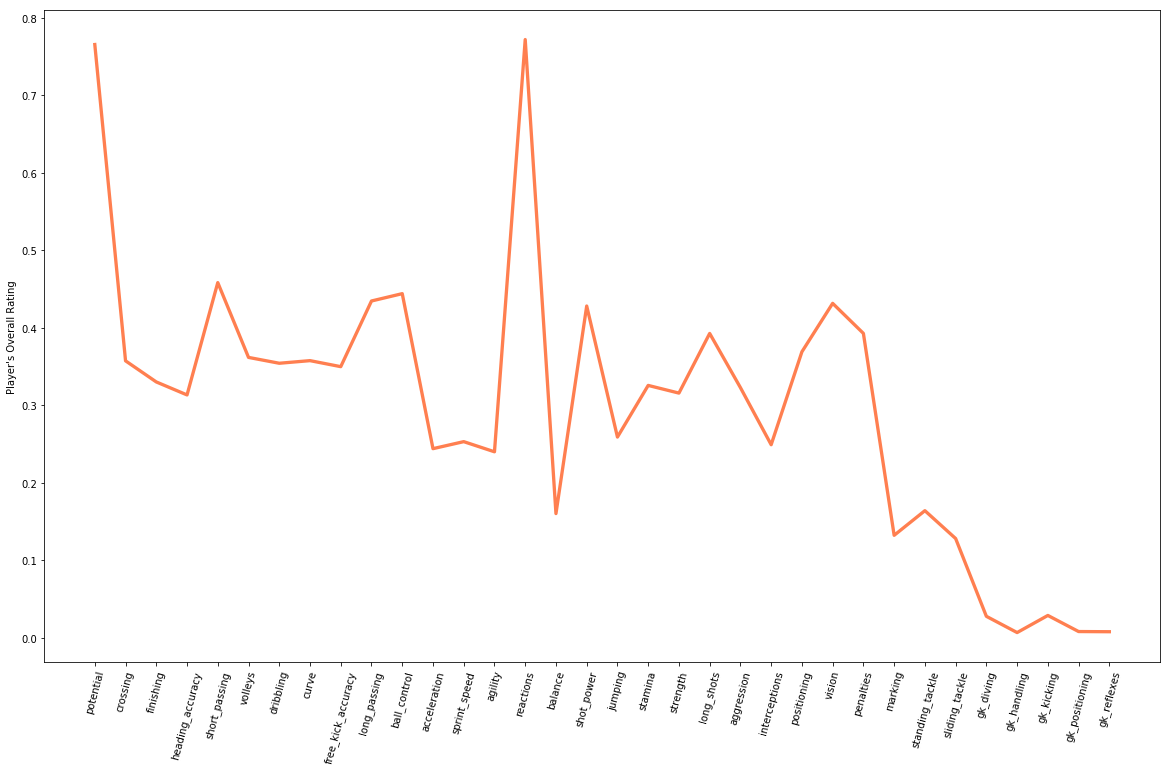

In [24]:
# let's plot above dataframe using the function we created
    
plot_dataframe(df2, 'Player\'s Overall Rating')

# Analysis of Findings

Five features with highest correlation coefficients<br>
We group similar players based on these features<br>
Selected some of the features with highest correlation with overall_rating

In [25]:
# Define the features you want to use for grouping players

select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']
select5features

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [26]:
# Generate a new dataframe by selecting the features you just defined

df_select = df[select5features].copy(deep=True)
df_select.head()

,gk_kicking,potential,marking,interceptions,standing_tackle
339,9.0,65.0,22.0,23.0,25.0
87343,79.0,66.0,73.0,68.0,71.0
89764,8.0,78.0,30.0,50.0,40.0
8508,15.0,88.0,30.0,42.0,42.0
48876,15.0,73.0,68.0,77.0,71.0


# Perform KMeans Clustering

Now we will use a machine learning method called KMeans to cluster the <br>values (i.e., player features on gk_kicking, potential, marking, interceptions, and standing_tackle). <br>We will ask for four clusters

In [29]:
# Perform scaling on the dataframe containing the features
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

data = scale(df_select)

# Define number of clusters
noOfClusters = 4

# Train a model
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [30]:
print(90*'_')
print("\nCount of players in each cluster")
print(90*'_')

pd.value_counts(model.labels_, sort=False)

__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________


0    50209
1    50468
2    55901
3    23776
dtype: int64

In [34]:
# Create a composite dataframe for plotting
def pd_centers(featuresUsed, centers):
    from itertools import cycle, islice
    from pandas.tools.plotting import parallel_coordinates
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

    colNames = list(featuresUsed)
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

P = pd_centers(featuresUsed=select5features, centers=model.cluster_centers_)
P

,gk_kicking,potential,marking,interceptions,standing_tackle,prediction
0,-0.337642,-0.842945,0.548435,0.407485,0.550860,0
1,-0.039864,0.704811,1.027756,0.982737,1.030343,1
2,-0.477122,0.105724,-0.947755,-0.975259,-0.914254,2
3,1.920534,0.037484,-1.111884,-0.653663,-1.201288,3


# Visualization of Clusters

We now have 4 clusters based on the features we selected, we can treat them as profiles for <br> similar groups of players. We can visualize these profiles by plotting the centers for each cluster, <br> i.e., the average values for each featuere within the cluster. We will use matplotlib for this <br>visualization. We will learn more about matplotlib later.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


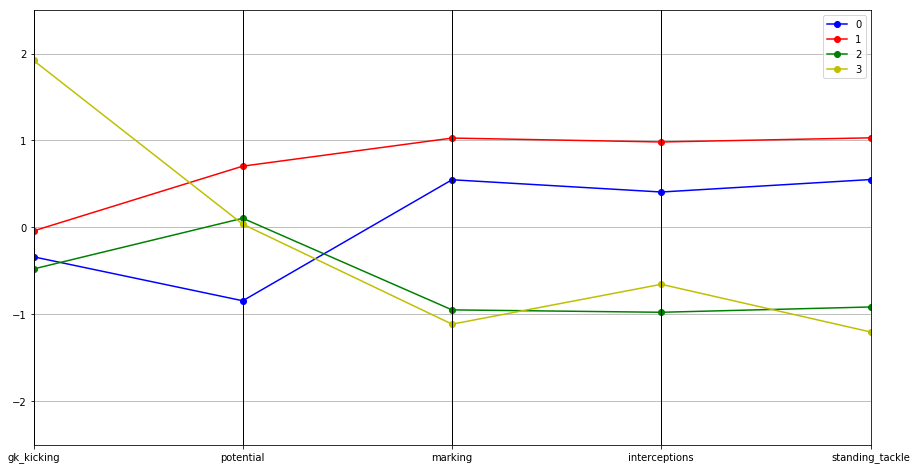

In [37]:
def parallel_plot(data):
    from itertools import cycle, islice
    from pandas.tools.plotting import parallel_coordinates
    import matplotlib.pyplot as plt

    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-2.5,+2.5])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')


parallel_plot(P)

# Analysis of Findings

Two groups are very similar except in gk_kicking - these players can coach each other on <br> gk_kicking, where they differ Two groups are somewhat similar to each other except in potential.